<a href="https://colab.research.google.com/github/priyanshunayak05/Neural_Network-Deep_Learning/blob/main/CNN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

There are various types of CNN architectures designed for different tasks and complexities. Some prominent ones include:

*   **LeNet-5**: One of the earliest and simplest CNNs, primarily used for digit recognition.
*   **AlexNet**: A deeper CNN that significantly improved image classification performance, known for using ReLU activation and dropout.
*   **VGGNet**: Characterized by its uniform architecture with multiple layers of 3x3 convolutional filters.
*   **GoogLeNet (Inception)**: Introduced the inception module to efficiently capture multi-scale features.
*   **ResNet (Residual Networks)**: Uses residual connections to train very deep networks and mitigate the vanishing gradient problem.
*   **DenseNet (Densely Connected Convolutional Networks)**: Connects each layer to every other layer in a feed-forward fashion to promote feature reuse.
*   **MobileNet**: Designed for mobile and embedded vision applications with efficient depthwise separable convolutions.

These architectures vary in their depth, the types of layers used, and how layers are connected, leading to different trade-offs in performance, computational cost, and memory usage.

**Application of CNN**

1. **Image classification** :-  CNNs are trained to categorize images based on their content, allowing for automated sorting of products in e-commerce, organization of personal photos, and classification of wildlife.
2. **Object detection** :- CNNs can locate and identify specific objects within an image, which is crucial for autonomous driving, surveillance systems, and medical image analysis.
3. **Image segmentation** :-  CNNs can partition an image into multiple segments or objects, useful in medical imaging for identifying tumors, or in autonomous driving for distinguishing between roads, pedestrians, and other vehicles.
4. **Video analysis** :- CNNs can be applied to video streams for tasks such as activity recognition, scene change detection, and video surveillance.
5. **Natural language processing (NLP)** :- While primarily used for images, CNNs have also been applied to NLP tasks like text classification and sentiment analysis by treating text as a 1D signal.
6. **Image localization** :- CNNs can determine the precise location of an object within an image, often by predicting bounding boxes around the object. This is a key component in object detection systems.

## Architecture of CNN

A typical CNN architecture consists of the following layers:


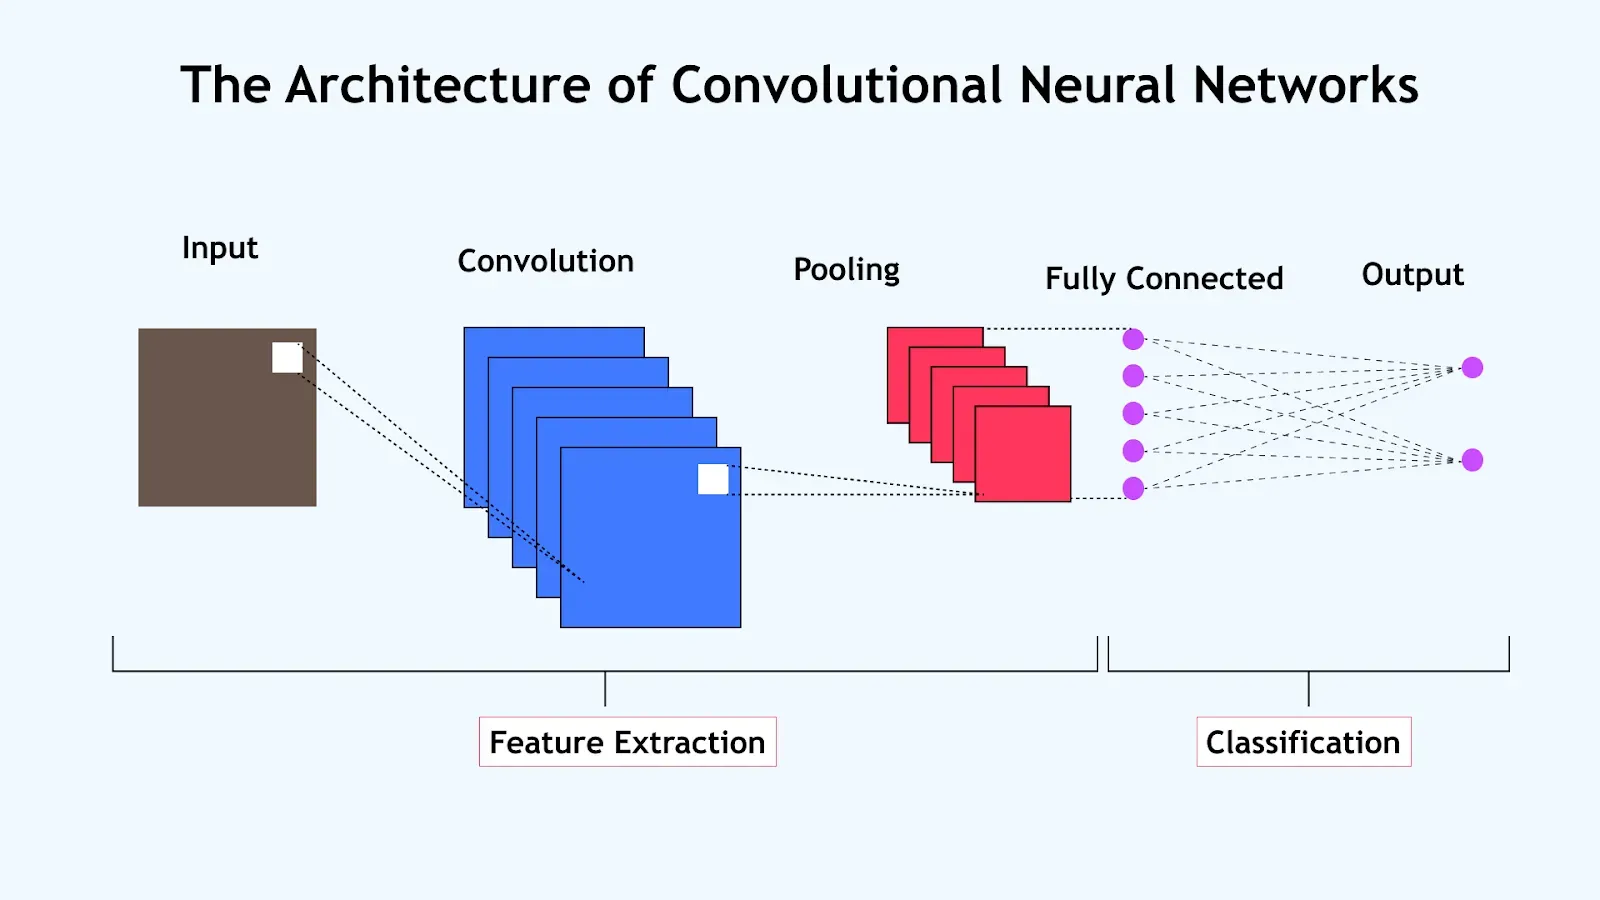

1.  **Input Layer**: This layer holds the raw pixel values of the image.
2.  **Convolutional Layer**: This is the core building block of a CNN. It applies a set of learnable filters (kernels) to the input image to create feature maps. Each filter detects a specific feature, such as edges, corners, or textures.
3.  **Activation Layer (e.g., ReLU)**: This layer applies a non-linear activation function to the output of the convolutional layer. The Rectified Linear Unit (ReLU) is a common choice, which introduces non-linearity and helps the network learn complex patterns.
4.  **Pooling Layer**: This layer reduces the spatial dimensions (width and height) of the feature maps, which helps to reduce the number of parameters and computational cost, as well as make the network more robust to small variations in the input. Max pooling and average pooling are common types.
5.  **Flatten Layer**: This layer takes the pooled feature maps and flattens them into a single vector. This vector is then fed into the fully connected layers.
6.  **Fully Connected Layer (Dense Layer)**: These are standard neural network layers where each neuron is connected to every neuron in the previous layer. They take the flattened feature vector as input and perform high-level reasoning.
7.  **Output Layer**: This layer produces the final output of the CNN. For classification tasks, this layer typically uses a softmax activation function to output a probability distribution over the classes.

These layers are often stacked in various combinations to build the CNN architecture. The specific arrangement and number of layers depend on the complexity of the task and the size of the dataset.

In [4]:
# Import Libraries

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


Load the dataset



In [5]:
# load the data set
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [6]:
# load the data set
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.8961 - loss: 0.3315 - val_accuracy: 0.9857 - val_loss: 0.0440
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9849 - loss: 0.0498 - val_accuracy: 0.9880 - val_loss: 0.0361
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9907 - loss: 0.0285 - val_accuracy: 0.9889 - val_loss: 0.0355
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9927 - loss: 0.0215 - val_accuracy: 0.9879 - val_loss: 0.0387
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9942 - loss: 0.0182 - val_accuracy: 0.9906 - val_loss: 0.0312
313/313 - 1s - 2ms/step - accuracy: 0.9906 - loss: 0.0312

Test accuracy: 0.9905999898910522


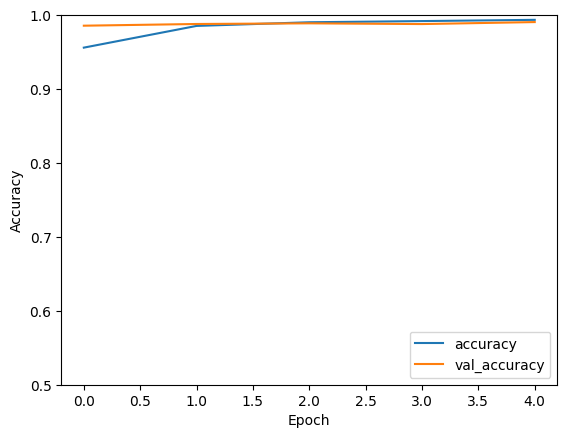

In [7]:
# Preprocess the data: Normalize pixel values to be between 0 and 1
# These two lines preprocess the image data. CNNs typically expect image data to have a channel dimension (e.g., 1 for grayscale, 3 for RGB).
# The reshape function adds this dimension.
# The pixel values are then converted to float32 and divided by 255 to normalize them to the range [0, 1]. This helps the training process.
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Define the CNN model
model = models.Sequential([
    # image size 32 and filter is 3*3
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # 2nd Convutational layer +maxPooling
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') # Output layer with 10 neurons for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Plot training history (optional)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

models.Sequential([...]): Creates a linear stack of layers.
layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)): The first convolutional layer with 32 filters of size 3x3. activation='relu' applies the ReLU activation function. input_shape=(28, 28, 1) specifies the shape of the input images.
layers.MaxPooling2D((2, 2)): A max pooling layer that reduces the spatial dimensions by taking the maximum value over a 2x2 window.
layers.Conv2D(64, (3, 3), activation='relu'): The second convolutional layer with 64 filters.
layers.MaxPooling2D((2, 2)): Another max pooling layer.
layers.Conv2D(64, (3, 3), activation='relu'): The third convolutional layer with 64 filters.
layers.Flatten(): Flattens the output of the convolutional layers into a 1D vector to be fed into the dense layers.
layers.Dense(64, activation='relu'): A fully connected (dense) layer with 64 neurons and ReLU activation.
layers.Dense(10, activation='softmax'): The output layer with 10 neurons (one for each digit class) and a softmax activation function, which outputs a probability distribution over the classes.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


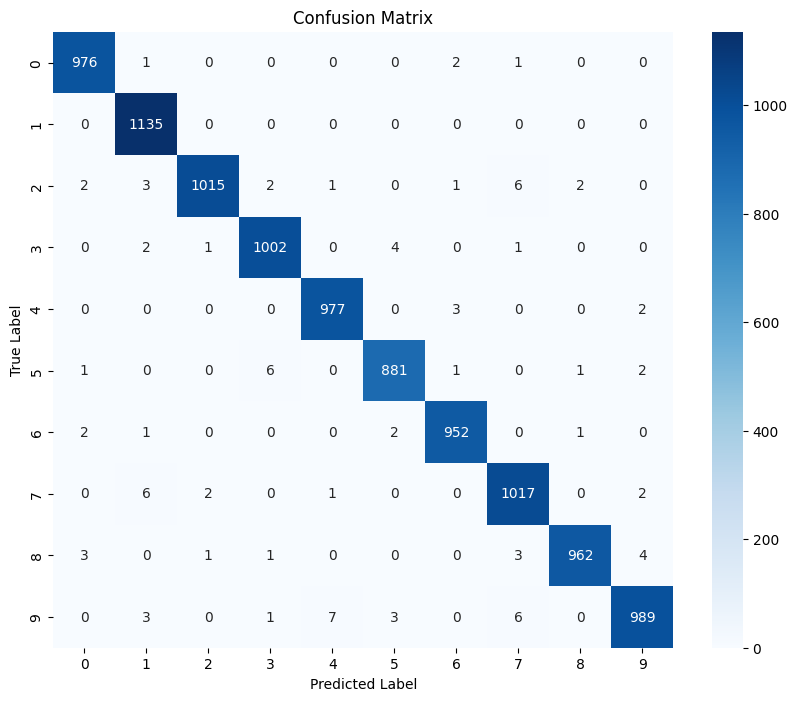

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get the model's predictions on the test set
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

LetNet Architecture


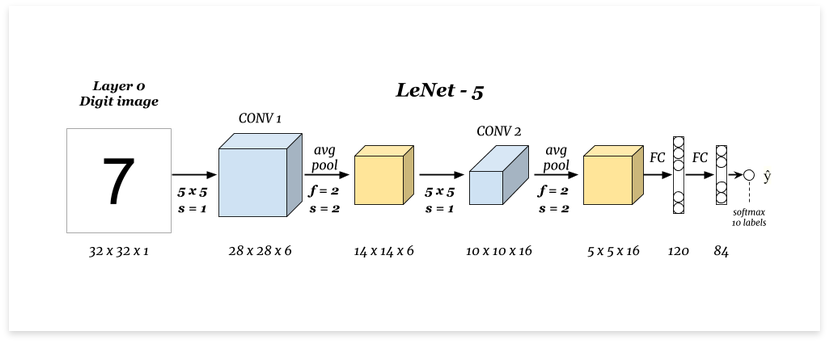

In [15]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

2. Pre-processing and Normalizing the Data

In [16]:
rows, cols = 28, 28

# Reshape the data into a 4D Array
x_train = x_train.reshape(x_train.shape[0], rows, cols, 1)
x_test = x_test.reshape(x_test.shape[0], rows, cols, 1)

input_shape = (rows,cols,1)

# Set type as float32 and normalize the values to [0,1]
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

# Transform labels to one hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)

3. Define LeNet-5 Model


In [17]:
def build_lenet(input_shape):
  # Define Sequential Model
  model = tf.keras.Sequential()

  # C1 Convolution Layer
  model.add(tf.keras.layers.Conv2D(filters=6, strides=(1,1), kernel_size=(5,5), activation='tanh', input_shape=input_shape))

  # S2 SubSampling Layer
  model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

  # C3 Convolution Layer
  model.add(tf.keras.layers.Conv2D(filters=6, strides=(1,1), kernel_size=(5,5), activation='tanh'))

  # S4 SubSampling Layer
  model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

  # C5 Fully Connected Layer
  model.add(tf.keras.layers.Dense(units=120, activation='tanh'))

  # Flatten the output so that we can connect it with the fully connected layers by converting it into a 1D Array
  model.add(tf.keras.layers.Flatten())

  # FC6 Fully Connected Layers
  model.add(tf.keras.layers.Dense(units=84, activation='tanh'))

  # Output Layer
  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

  return model

4. Evaluate the Model and Visualize the process

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8327 - loss: 0.5822
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9556 - loss: 0.1491
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9720 - loss: 0.0961
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9774 - loss: 0.0725
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9818 - loss: 0.0609
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9851 - loss: 0.0504
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9870 - loss: 0.0439
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9892 - loss: 0.0368
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9898 - loss: 0.0346
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9919 - loss: 0.0296
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9834 - loss: 0.0491
Accuracy :  0.986299991607666
Training Data (60000, 28, 28) (600

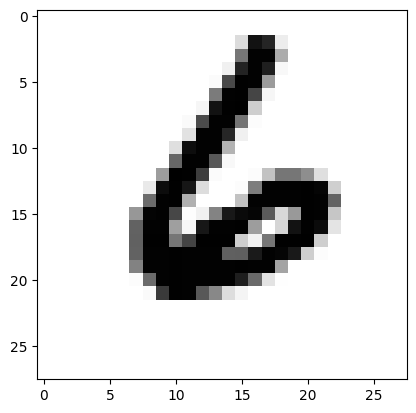

In [18]:
lenet = build_lenet(input_shape)

# Compile the model
lenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# We will be allowing 10 itterations to happen
epochs = 10
history = lenet.fit(x_train, y_train, epochs=epochs,batch_size=128, verbose=1)

# Check Accuracy of the Model
# Transform labels to one hot encoding
if len(y_test.shape) != 2 or y_test.shape[1] != 10:
  y_test = tf.keras.utils.to_categorical(y_test, 10)

loss ,acc= lenet.evaluate(x_test, y_test)
print('Accuracy : ', acc)

x_train = x_train.reshape(x_train.shape[0], 28,28)
print('Training Data', x_train.shape, y_train.shape)
x_test = x_test.reshape(x_test.shape[0], 28,28)
print('Test Data', x_test.shape, y_test.shape)

# Plot the Image
image_index = 8888
plt.imshow(x_test[image_index].reshape(28,28), cmap='Greys')

# Make Prediction
pred = lenet.predict(x_test[image_index].reshape(1, rows, cols, 1 ))
print(pred.argmax())

Implementation of AlexNet for Object Classification

In [19]:
# 1. Import Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [20]:
# 2. Load and Preprocess CIFAR-10 Dataset

In [21]:
# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [22]:
# 3. Define the AlexNet Model (Adjusted for CIFAR-10)

In [23]:
# Adjusted to CIFAR-10's 32×32 input size and 10 output classes.
# Reduced FC layers from 4096→1024→512 to avoid overfitting on small images.
# Uses ReLU, Dropout, BatchNorm and softmax in the final layer.

In [24]:
model = Sequential()

# Layer 1
model.add(Conv2D(96, kernel_size=(3,3), strides=(1,1), input_shape=(32,32,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(BatchNormalization())

# Layer 2
model.add(Conv2D(256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(BatchNormalization())

# Layer 3
model.add(Conv2D(384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))

# Layer 4
model.add(Conv2D(384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))

# Layer 5
model.add(Conv2D(256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Flatten
model.add(Flatten())

# Fully Connected Layer 1
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Fully Connected Layer 2
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(10))
model.add(Activation('softmax'))

In [25]:
# 4. Compile the Model

In [26]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [27]:
# 5. Train the Model

In [28]:
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=15,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 76ms/step - accuracy: 0.3074 - loss: 1.8845 - val_accuracy: 0.1064 - val_loss: 5.0637
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.5693 - loss: 1.2047 - val_accuracy: 0.4667 - val_loss: 1.5635
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.6571 - loss: 0.9797 - val_accuracy: 0.6473 - val_loss: 1.0072
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.7162 - loss: 0.8137 - val_accuracy: 0.6030 - val_loss: 1.2411
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.7554 - loss: 0.7119 - val_accuracy: 0.7272 - val_loss: 0.8097
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.8004 - loss: 0.5839 - val_accuracy: 0.7315 - val_loss: 0.7998
Epoch 7/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.8234 - loss: 0.5223 - val_accuracy: 0.7224 - val_loss: 0.8583
Epoch 8/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.8493 - loss: 0.4348 - 

In [29]:
# 6. Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.7167


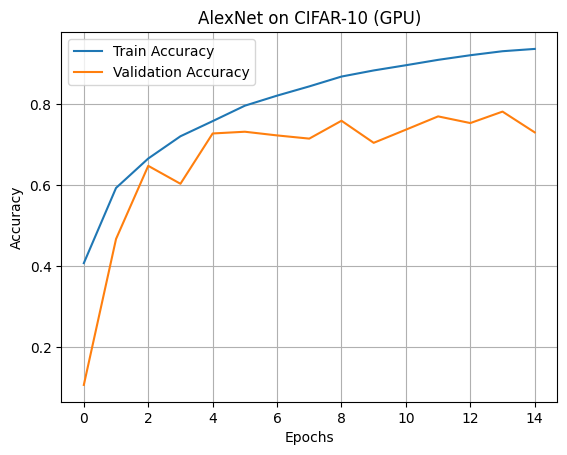

In [30]:
# 7. Plot Training & Validation Accuracy



plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('AlexNet on CIFAR-10 (GPU)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()